# Projeto de Criar uma rede Neural

Aluno: Paulo Victor Fonseca Sousa

Matricula:211043718

Github:PauloVictorFS

## Introdução
O projeto a seguir tem como objetivo explorar o aprendizado de máquina aplicado à  construir uma rede neural . A tarefa principal será criar uma rede neural capaz de predizer a sobrevivencia de uma arvore conforme os critérios que serão apresentados abaixo. Além disso, Esse projeto foi organizado conforme as diretrizes específicas apresentadas A seguir

Critérios do projeto:
Propósito: O projeto tem como propósito principal a criação de uma rede neural capaz de predizer a sobrevivencia de uma arvore

Tema Abordado na Lição: O projeto está alinhado com os conceitos e técnicas apresentados na lição do Fastai relacionada ao Linear model and neural net from scratch (Link: https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch/notebook)

Dado Coerente com o Tema e Aquisição do dado: Os dados utilizados para auxiliar a criação da rede foram encontrados no Kaggle:  tree-survival-prediction(https://www.kaggle.com/datasets/yekenot/tree-survival-prediction)


Organização: O projeto é organizado em células de código que executam tarefas específicas, desde a aquisição de dados até a criação, treinamento e avaliação. Isso proporciona uma estrutura clara para compreender o fluxo de trabalho. Cada célula será explicada de forma detalhada

Jupyter: O projeto é elaborado usando um ambiente Kaggle, o que permite documentar as etapas do projeto e executar código interativamente.

## Informações do Dataset

No: Seedling unique ID number.

Plot: Number of the field plot the seedling was planted in. (1-18)

Subplot: Subplot within the main plot the seedling was planted in. Broken into 5 subplots (1 per corner, plus 1 in the middle). (A-E)

Species: Includes Acer saccharum, Prunus serotina, Quercus alba, and Quercus rubra.

Light ISF: Light level quantified with HemiView software. Represents the amount of light reaching each subplot at a height of 1m.

Light Cat: Categorical light level created by splitting the range of Light_ISF values into three bins (low, med, high).

Core: Year the soil core was removed from the field.

Soil: Species from which the soil core was taken. Includes all species, plus Acer rubrum, Populus grandidentata, and a sterilized conspecific for each species.

Adult: Individual tree that soil was taken from. Up to 6 adults per species. Used as a random effect in analyses.

Sterile: Whether the soil was sterilized or not.

Conspecific: Whether the soil was conspecific, heterospecific, or sterilized conspecific.

Myco: Mycorrhizal type of the seedling species (AMF or EMF).

SoilMyco: Mycorrhizal type of the species culturing the soil (AMF or EMF).

PlantDate: The date that seedlings were planted in the field pots.

AMF: Percent arbuscular mycorrhizal fungi colonization on the fine roots of harvested seedlings.

EMF: Percent ectomycorrhizal fungi colonization on the root tips of harvested seedlings.

Phenolics: Calculated as nmol Gallic acid equivalents per mg dry extract (see manuscript for detailed methods)

NSC: Calculated as percent dry mass nonstructural carbohydrates (see manuscript for detailed methods)

Lignin: Calculated as percent dry mass lignin (see manuscript for detailed methods)

Census: The census number at which time the seedling died or was harvested.

Time: The number of days at which time the seedling died or was harvested.

Event: Used for survival analysis to indicate status of each individual seedling at a given time (above)
- 0 = harvested or experiment ended
- 1 = dead

Harvest: Indicates whether the seedling was harvested for trait measurement.

Alive: Indicates if the seedling was alive at the end of the second growing season. "X" in this field indicates alive status.

 ## Configurando o Ambiente

Nessa etapa é realizado a importação das bibliotecas necessárias para trabalhar com o projeto, é  criado o path para o dataset , e é lido  o conjunto de dados do arquivo "Tree_Data.csv" localizado no caminho especificado na primeira célula. O conjunto de dados é carregado em um DataFrame do Pandas chamado "df". Isso permite a visualização e a manipulação de dados do dataset

In [ ]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('/kaggle/input/tree-survival-prediction')
else:
    path = Path('Tree_Data')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [2]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [3]:
df = pd.read_csv(path/'Tree_Data.csv')
df

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2778,7165,17,B,Prunus serotina,0.111,Med,2017,Populus grandidentata,891,Non-Sterile,...,40.89,NaN,0.83,9.15,11.88,16,56.0,1.0,NaN,NaN
2779,7217,17,D,Quercus alba,0.118,Med,2017,Acer rubrum,1468,Non-Sterile,...,15.47,32.82,4.88,19.01,23.50,16,56.0,1.0,NaN,NaN
2780,7306,17,D,Quercus alba,0.118,Med,2017,Quercus rubra,1454,Non-Sterile,...,11.96,37.67,5.51,21.13,19.10,16,56.0,1.0,NaN,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


## Análise do dado:
Nesta seção, é realizado uma análise inicial dos dados para entender melhor o conjunto de dados e como lidar com valores ausentes e diferentes tipos de variáveis. primeiramente, é utilizado o método .isna() para verificar valores ausentes em cada coluna do DataFrame df. O .sum() subsequente soma o número de valores ausentes em cada coluna. Isso é útil para identificar quais colunas têm valores ausentes

In [4]:
df.isna().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

Nesta linha, é calculado as modas para cada coluna do DataFrame df usando o método .mode(). As modas são os valores mais frequentes em cada coluna. O .iloc[0] pega o primeiro valor (caso haja múltiplas modas). Essas modas serão usadas para preencher os valores ausentes.

In [5]:
modes = df.mode().iloc[0]
modes

No                          3
Plot                     11.0
Subplot                     A
Species        Acer saccharum
Light_ISF               0.087
Light_Cat                 Med
Core                   2017.0
Soil                  Sterile
Adult                     984
Sterile           Non-Sterile
Conspecific    Heterospecific
Myco                      AMF
SoilMyco                  AMF
PlantDate              6/7/18
AMF                       0.0
EMF                       0.0
Phenolics               -0.03
Lignin                  13.73
NSC                     12.21
Census                    7.0
Time                     24.5
Event                     1.0
Harvest                     X
Alive                       X
Name: 0, dtype: object

Nesta linha, é preenchido os valores ausentes no DataFrame df com as modas que foram calculadas na célula anterior. O argumento inplace=True faz com que as alterações sejam aplicadas diretamente ao DataFrame, em vez de criar um novo DataFrame.



In [7]:
df.fillna(modes, inplace=True)

Nesta linha, é verificado novamente se existem valores ausentes após o preenchimento com as modas. Isso é uma etapa importante para garantir que todos os valores ausentes tenham sido tratados.

In [8]:
df.isna().sum()

No             0
Plot           0
Subplot        0
Species        0
Light_ISF      0
Light_Cat      0
Core           0
Soil           0
Adult          0
Sterile        0
Conspecific    0
Myco           0
SoilMyco       0
PlantDate      0
AMF            0
EMF            0
Phenolics      0
Lignin         0
NSC            0
Census         0
Time           0
Event          0
Harvest        0
Alive          0
dtype: int64

Nesta linha, é gerado estatísticas descritivas para as colunas que contêm números. O método .describe() fornece estatísticas como média, desvio padrão, valores mínimo e máximo,  para as colunas numéricas.

In [9]:
import numpy as np

df.describe(include=(np.number))

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,12.206134,1.933105,15.759792,14.219641,15.282070,53.487244,0.570607
std,2253.515063,5.203659,0.025638,0.477387,12.309587,17.372395,1.969842,6.779607,4.298271,9.166555,32.082942,0.495078
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.000000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,0.000000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,0.000000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,25.915000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.500000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


## Modificando o Dado
Primeiramente, nessa etapa será analisado o valor do 'Light_ISF', Que possui valores muito grandes, que podem causar problemas ao modelo, dessa forma é mostrado no histograma a distribuição dos valores 

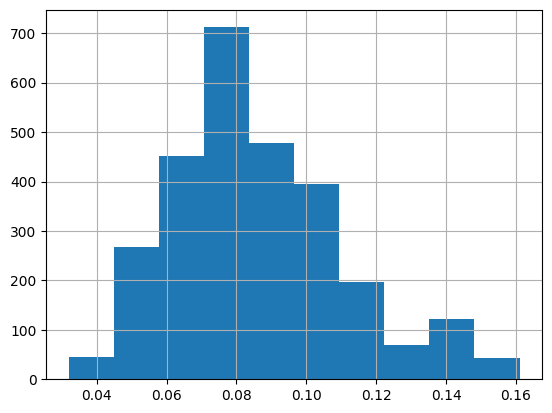

In [29]:
df['Light_ISF'].hist();

Para isso é realizado um logaritmo para diminuir os valores mais elevados, e em seguida é mostrado o novo valor do logLight_ISF

In [24]:
df['LogLight_ISF'] = np.log(df['Light_ISF']+1)

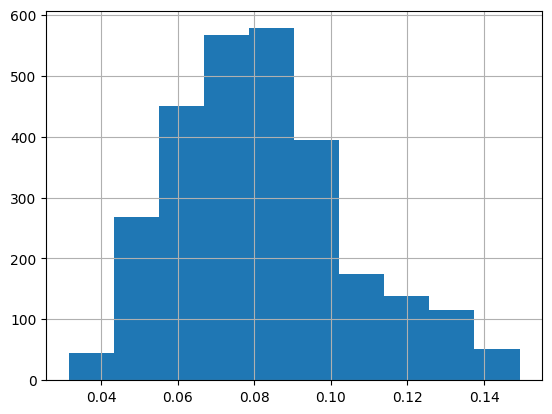

In [26]:
df['LogLight_ISF'].hist();

Nesta etapa, um resumo estatístico das colunas que contêm tipos de objeto (geralmente, colunas categóricas) é gerado. Esse resumo inclui estatísticas como contagem, número de valores únicos, a categoria mais frequente e outras métricas relevantes. Essa informação é útil para entender a distribuição e a natureza das colunas categóricas no DataFrame.

In [37]:
df.describe(include=[object])

,Subplot,Species,Light_Cat,Soil,Adult,Sterile,Conspecific,PlantDate
count,2783,2783,2783,2783,2783,2783,2783,2783
unique,5,4,3,7,36,2,3,19
top,A,Acer saccharum,Med,Sterile,I,Non-Sterile,Heterospecific,6/7/18
freq,701,751,1474,423,90,2360,1974,340


Nesta etapa, variáveis dummy são criadas para as colunas categóricas "Harvest", "Alive" e "SoilMyco" usando o método pd.get_dummies(). Isso resulta na criação de novas colunas binárias (com valores 0 ou 1) para cada valor distinto encontrado nessas colunas. Por exemplo, para a coluna "Harvest", uma nova coluna "Harvest_X" é colocada no DataFrame para cada valor único presente em "Harvest". Isso é útil para representar informações categóricas em um formato numérico que pode ser utilizado em modelos de aprendizado de máquina. As colunas originais são removidas.

In [38]:
df = pd.get_dummies(df, columns=["Harvest","Alive","SoilMyco"])
df.columns

KeyError: "None of [Index(['Harvest', 'Alive', 'SoilMyco'], dtype='object')] are in the [columns]"

Neste estágio, uma lista chamada added_cols é criada e exibida, contendo os nomes das colunas que foram adicionadas como variáveis dummy na célula anterior.

In [39]:
added_cols = ['AMF',
       'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census', 'Time', 'Event', 'LogLight_ISF', 'Harvest_X', 'Alive_X', 'Myco_AMF', 'Myco_EMF',
       'SoilMyco_AMF', 'SoilMyco_EMF', 'SoilMyco_Sterile']
df[added_cols].head()
     

,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,LogLight_ISF,Harvest_X,Alive_X,Myco_AMF,Myco_EMF,SoilMyco_AMF,SoilMyco_EMF,SoilMyco_Sterile
0,22.00,0.00,-0.56,13.86,12.15,4,14.0,1.0,0.100750,True,True,True,False,True,False,False
1,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,0.100750,True,True,False,True,False,True,False
2,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,0.100750,True,True,False,True,True,False,False
3,22.23,0.00,-0.71,14.29,12.36,4,14.0,1.0,0.076961,True,True,True,False,True,False,False
4,21.15,0.00,-0.58,10.85,11.20,4,14.0,1.0,0.058269,True,True,True,False,True,False,False


In [46]:
df['Harvest_X'] = df['Harvest_X'].astype(int)
df['Alive_X'] = df['Alive_X'].astype(int)
df['Myco_AMF'] = df['Myco_AMF'].astype(int)
df['Myco_EMF'] = df['Myco_EMF'].astype(int)
df['SoilMyco_AMF'] = df['SoilMyco_AMF'].astype(int)
df['SoilMyco_EMF'] = df['SoilMyco_EMF'].astype(int)
df['SoilMyco_Sterile'] = df['SoilMyco_Sterile'].astype(int)

In [47]:
df[added_cols].head()

,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,LogLight_ISF,Harvest_X,Alive_X,Myco_AMF,Myco_EMF,SoilMyco_AMF,SoilMyco_EMF,SoilMyco_Sterile
0,22.00,0.00,-0.56,13.86,12.15,4,14.0,1.0,0.100750,1,1,1,0,1,0,0
1,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,0.100750,1,1,0,1,0,1,0
2,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,0.100750,1,1,0,1,1,0,0
3,22.23,0.00,-0.71,14.29,12.36,4,14.0,1.0,0.076961,1,1,1,0,1,0,0
4,21.15,0.00,-0.58,10.85,11.20,4,14.0,1.0,0.058269,1,1,1,0,1,0,0


## Criação do Tensor

Nessa parte foi criads a variável dependente, que é a de principal interesse ao projeto, no caso foi escolhido a "Event"

In [43]:
from torch import tensor

t_dep = tensor(df.Event)

Na segunda célula, as variáveis independentes são criadas. Essas variáveis representam as características usadas para realizar previsões ou análises. Todas as variáveis independentes são convertidas em tensores PyTorch por meio da função tensor(), com a especificação do tipo de dados como torch.float. No projeto, as variáveis independentes podem ser identificadas como 'LogLight_ISF', 'Myco_AMF','Myco_EMF','SoilMyco_AMF','SoilMyco_EMF'

In [48]:
indep_cols = ['LogLight_ISF', 'Myco_AMF','Myco_EMF','SoilMyco_AMF','SoilMyco_EMF'] + added_cols

t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[    0.1007,     1.0000,     0.0000,     1.0000,     0.0000,    22.0000,     0.0000,  ...,     1.0000,     1.0000,     1.0000,
             0.0000,     1.0000,     0.0000,     0.0000],
        [    0.1007,     0.0000,     1.0000,     0.0000,     1.0000,    15.8200,    31.0700,  ...,     1.0000,     1.0000,     0.0000,
             1.0000,     0.0000,     1.0000,     0.0000],
        [    0.1007,     0.0000,     1.0000,     1.0000,     0.0000,    24.4500,    28.1900,  ...,     1.0000,     1.0000,     0.0000,
             1.0000,     1.0000,     0.0000,     0.0000],
        [    0.0770,     1.0000,     0.0000,     1.0000,     0.0000,    22.2300,     0.0000,  ...,     1.0000,     1.0000,     1.0000,
             0.0000,     1.0000,     0.0000,     0.0000],
        [    0.0583,     1.0000,     0.0000,     1.0000,     0.0000,    21.1500,     0.0000,  ...,     1.0000,     1.0000,     1.0000,
             0.0000,     1.0000,     0.0000,     0.0000],
        [    0.1007,     1.0000,   

Nessa célula é exibida a forma do tensor que contém as variáveis independentes, mostrando linha e coluna

In [49]:
t_indep.shape

torch.Size([2783, 21])

## Criação do Modelo linear

Nesta seção, um modelo linear é criado para realizar previsões com base nas variáveis independentes. O processo envolve o cálculo de predições e da função de perda para cada linha dos dados de entrada. O modelo linear é definido utilizando coeficientes para cada coluna em t_indep. Coeficientes aleatórios no intervalo (-0.5, 0.5) são gerados e um valor de semente é estabelecido para garantir consistência nas explicações. O número de coeficientes é igual ao número de colunas em t_indep.

In [50]:
torch.manual_seed(442)

n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534])

As predições do modelo linear são calculadas multiplicando cada linha das variáveis independentes por seus respectivos coeficientes e somando os resultados. Notavelmente, não é necessário um termo constante separado (também conhecido como termo "bias" ou "intercept") ou uma coluna de todos 1, pois as variáveis dummy já cobrem todo o conjunto de dados. As variáveis independentes multiplicadas pelos coeficientes são apresentadas.

In [51]:
t_indep*coeffs

tensor([[    -0.0466,      0.1386,      0.0000,     -0.2262,     -0.0000,     -6.9237,      0.0000,  ...,     -0.3575,     -0.0010,
             -0.1833,     -0.0000,      0.0489,      0.0000,     -0.0000],
        [    -0.0466,      0.0000,      0.2409,     -0.0000,     -0.2632,     -4.9788,     15.1500,  ...,     -0.3575,     -0.0010,
             -0.0000,     -0.2411,      0.0000,      0.0866,     -0.0000],
        [    -0.0466,      0.0000,      0.2409,     -0.2262,     -0.0000,     -7.6948,     13.7457,  ...,     -0.3575,     -0.0010,
             -0.0000,     -0.2411,      0.0489,      0.0000,     -0.0000],
        [    -0.0356,      0.1386,      0.0000,     -0.2262,     -0.0000,     -6.9961,      0.0000,  ...,     -0.3575,     -0.0010,
             -0.1833,     -0.0000,      0.0489,      0.0000,     -0.0000],
        [    -0.0270,      0.1386,      0.0000,     -0.2262,     -0.0000,     -6.6562,      0.0000,  ...,     -0.3575,     -0.0010,
             -0.1833,     -0.0000,      

Nesta parte, uma normalização é aplicada às variáveis independentes para evitar que uma coluna domine as outras. As colunas são normalizadas dividindo cada coluna pelo valor máximo da coluna. Isso é feito para manter a escala das variáveis consistente.

In [52]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

Após a normalização, as predições do modelo linear são recalculadas multiplicando as variáveis independentes normalizadas pelos coeficientes. O resultado é um tensor de predições.

In [53]:
t_indep*coeffs

tensor([[-0.3124,  0.1386,  0.0000, -0.2262, -0.0000, -0.0692,  0.0000,  ..., -0.3575, -0.0010, -0.1833, -0.0000,  0.0489,  0.0000,
         -0.0000],
        [-0.3124,  0.0000,  0.2409, -0.0000, -0.2632, -0.0498,  0.1731,  ..., -0.3575, -0.0010, -0.0000, -0.2411,  0.0000,  0.0866,
         -0.0000],
        [-0.3124,  0.0000,  0.2409, -0.2262, -0.0000, -0.0769,  0.1571,  ..., -0.3575, -0.0010, -0.0000, -0.2411,  0.0489,  0.0000,
         -0.0000],
        [-0.2386,  0.1386,  0.0000, -0.2262, -0.0000, -0.0700,  0.0000,  ..., -0.3575, -0.0010, -0.1833, -0.0000,  0.0489,  0.0000,
         -0.0000],
        [-0.1807,  0.1386,  0.0000, -0.2262, -0.0000, -0.0666,  0.0000,  ..., -0.3575, -0.0010, -0.1833, -0.0000,  0.0489,  0.0000,
         -0.0000],
        [-0.3124,  0.1386,  0.0000, -0.2262, -0.0000, -0.1111,  0.0000,  ..., -0.3575, -0.0010, -0.1833, -0.0000,  0.0489,  0.0000,
         -0.0000],
        [-0.3180,  0.0000,  0.2409, -0.0000, -0.2632, -0.0755,  0.1115,  ..., -0.3575, -0.0010

Com as variáveis independentes normalizadas, as predições finais do modelo linear são calculadas somando as linhas do produto das variáveis independentes normalizadas pelos coeficientes.

In [54]:
preds = (t_indep*coeffs).sum(axis=1)

In [55]:
preds[:10]

tensor([-0.6552,  0.1597,  0.0335, -0.6264, -0.5995, -0.6513, -0.4484, -0.2906,  0.1958, -0.5594])

Para avaliar o desempenho do modelo, uma função de perda é calculada. Nesse caso, a média do erro absoluto entre as predições e as variáveis dependentes é utilizada como métrica de perda.

In [56]:
loss = torch.abs(preds-t_dep).mean()
loss

tensor(0.8969, dtype=torch.float64)

Duas funções são definidas para simplificar o processo de cálculo das predições e da função de perda. A função calc_preds calcula as predições, enquanto a função calc_loss calcula a função de perda com base nas predições e nas variáveis dependentes.

In [57]:
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

## Fazendo uma etapa de descida gradiente

Para que o PyTorch calcule os gradientes, é necessário chamar a função requires_grad_() em nossos coeficientes.

Os coeficientes são marcados para permitir o cálculo de gradientes. Ao calcular a função de perda, o PyTorch acompanhará todas as etapas, permitindo a obtenção dos gradientes posteriormente.

In [58]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625,  0.1722,  0.2324,
        -0.3575, -0.0010, -0.1833, -0.2411,  0.0489,  0.0866, -0.0534], requires_grad=True)

In [59]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss

tensor(0.8969, dtype=torch.float64, grad_fn=<MeanBackward0>)

Usando a função backward(), é solicitado ao PyTorch que calcule os gradientes nesse momento. Os gradientes calculados para cada coeficiente são exibidos

In [60]:
loss.backward()

In [61]:
coeffs.grad

tensor([-0.3588, -0.5390, -0.1204, -0.2767, -0.2803, -0.1452, -0.0284, -0.0923, -0.2537, -0.2734, -0.1304, -0.1304, -0.5706, -0.3588,
        -0.6594, -0.6594, -0.5390, -0.1204, -0.2767, -0.2803, -0.1024])

Os valores dos gradientes são duplicados devido à acumulação nas chamadas anteriores. Portanto, após o uso dos gradientes para realizar uma etapa de descida gradiente, é necessário redefinir os gradientes para zero.

In [62]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.7176, -1.0780, -0.2407, -0.5534, -0.5605, -0.2905, -0.0567, -0.1845, -0.5074, -0.5468, -0.2608, -0.2608, -1.1412, -0.7176,
        -1.3187, -1.3187, -1.0780, -0.2407, -0.5534, -0.5605, -0.2048])

Uma única etapa de descida gradiente é realizada e verificamos se a perda diminui. Os coeficientes são atualizados usando a regra da taxa de aprendizado (0.1 neste caso). Após a atualização, os gradientes são redefinidos para zero.

É importante notar que a.sub_(b) subtrai b de a no local (in-place). Em PyTorch, qualquer método que termine com _ altera o objeto in-place. Da mesma forma, a.zero_() define todos os elementos de um tensor como zero.

In [63]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad * 0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, t_indep, t_dep))

tensor(0.4245, dtype=torch.float64)


## Treinamento Do Modelo

Antes de iniciar o treinamento do modelo linear, é importante garantir que um conjunto de validação seja mantido para calcular as métricas. A célula utiliza o RandomSplitter para obter índices que dividirão os dados em conjuntos de treinamento e validação. Isso é feito para que possamos comparar nosso método com o que a biblioteca fastai faz no próximo notebook.

In [64]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

Os índices obtidos na célula anterior são aplicados aos dados independentes e dependentes. Portanto, temos conjuntos de treinamento e validação separados para ambos. O número de amostras em cada conjunto é exibido.

In [65]:
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(2227, 556)

Nesta célula, são definidas três funções que automatizam o processo de treinamento do modelo linear:

**update_coeffs**: Atualiza os coeficientes com base nos gradientes calculados. A taxa de aprendizado (lr) é usada para controlar o tamanho da atualização.

**one_epoch**: Realiza uma única época de treinamento, calculando a perda, aplicando o gradiente descendente e atualizando os coeficientes. O progresso do treinamento é impresso.

**init_coeffs:** Inicializa os coeficientes com números aleatórios.

In [66]:
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [72]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [67]:
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

A função train_model é definida para treinar o modelo linear. O treinamento é realizado em várias épocas (neste exemplo, 18 épocas) com uma determinada taxa de aprendizado (lr). Os coeficientes do modelo são retornados após o treinamento.

In [70]:
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

A função show_coeffs é definida para exibir os coeficientes finais para cada coluna. Ela retorna um dicionário que mapeia o nome da coluna aos coeficientes correspondentes. Os coeficientes são obtidos dos dados finais do modelo treinado.

In [73]:
coeffs = train_model(18, lr=0.2)

0.907; 0.495; 0.315; 0.293; 0.644; 0.496; 0.641; 0.498; 0.641; 0.499; 0.644; 0.497; 0.646; 0.495; 0.648; 0.493; 0.651; 0.491; 

In [74]:
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()

{'LogLight_ISF': tensor(0.2465),
 'Myco_AMF': tensor(-0.0312),
 'Myco_EMF': tensor(-0.3625),
 'SoilMyco_AMF': tensor(0.0629),
 'SoilMyco_EMF': tensor(0.0990),
 'AMF': tensor(-0.2996),
 'EMF': tensor(0.4419),
 'Phenolics': tensor(0.2348),
 'Lignin': tensor(0.2447),
 'NSC': tensor(-0.4496),
 'Census': tensor(0.1517),
 'Time': tensor(0.3039),
 'Event': tensor(0.4402),
 'Harvest_X': tensor(-0.3268),
 'Alive_X': tensor(0.0298),
 'SoilMyco_Sterile': tensor(-0.0490)}

Aqui estamos medindo a precisão do modelo, que é a proporção de linhas em que fazemos uma previsão correta de sobrevivência. Para calcular a precisão no conjunto de validação, primeiro calculamos as previsões.

In [75]:
preds = calc_preds(coeffs, val_indep)

Assumimos que qualquer árvore com uma pontuação superior a 0,5 é prevista como sobrevivente. Portanto, a precisão é calculada comparando se preds>0.5 é igual à variável dependente val_dep. Os resultados indicam se as previsões estão corretas para as primeiras 16 amostras no conjunto de validação.

In [76]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([False,  True,  True, False,  True, False, False,  True, False,  True,  True,  True, False,  True, False, False])

In [121]:
# Supondo que 'results' seja o tensor de resultados e 'val_dep' seja o tensor da variável dependente no conjunto de validação
results = results[:16]
val_dep = val_dep[:16]

print("Resultados:")
print(results)

print("Variáveis Dependentes:")
print(val_dep)

Amostra 1 - Resultado: False, Variável Dependente: 1.0
Amostra 2 - Resultado: True, Variável Dependente: 0.0
Amostra 3 - Resultado: True, Variável Dependente: 0.0
Amostra 4 - Resultado: False, Variável Dependente: 1.0
Amostra 5 - Resultado: True, Variável Dependente: 0.0
Amostra 6 - Resultado: False, Variável Dependente: 1.0
Amostra 7 - Resultado: False, Variável Dependente: 1.0
Amostra 8 - Resultado: True, Variável Dependente: 0.0
Amostra 9 - Resultado: False, Variável Dependente: 1.0
Amostra 10 - Resultado: True, Variável Dependente: 0.0
Amostra 11 - Resultado: True, Variável Dependente: 0.0
Amostra 12 - Resultado: True, Variável Dependente: 0.0
Amostra 13 - Resultado: False, Variável Dependente: 1.0
Amostra 14 - Resultado: True, Variável Dependente: 0.0
Amostra 15 - Resultado: False, Variável Dependente: 1.0
Amostra 16 - Resultado: False, Variável Dependente: 1.0


Calculamos a média de precisão com base nos resultados. A função acc é definida para calcular facilmente a precisão para outros modelos que treinarmos.

In [77]:
results.float().mean()

tensor(0.4622)

Observamos que algumas previsões da probabilidade de sobrevivência são maiores que 1 e outras são menores que 0. Para corrigir isso, passamos cada previsão pela função sigmóide, que tem um mínimo de 0 e um máximo de 1. A função sigmóide é definida em PyTorch, e é usada para calcular as previsões no conjunto de validação.

In [78]:
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.4622)

In [79]:
preds[:28]

tensor([ 0.0273, -0.0945, -0.2099,  0.1648, -0.1235,  0.0905,  0.2495, -0.2880,  0.2458, -0.2381, -0.3830, -0.3268, -0.0239, -0.0930,
         0.2265,  0.1939, -0.6607,  0.0602,  0.1620,  0.1024,  0.2763,  0.2610, -0.5397,  0.1955, -0.0903,  0.1399,  0.0647,  0.1865])

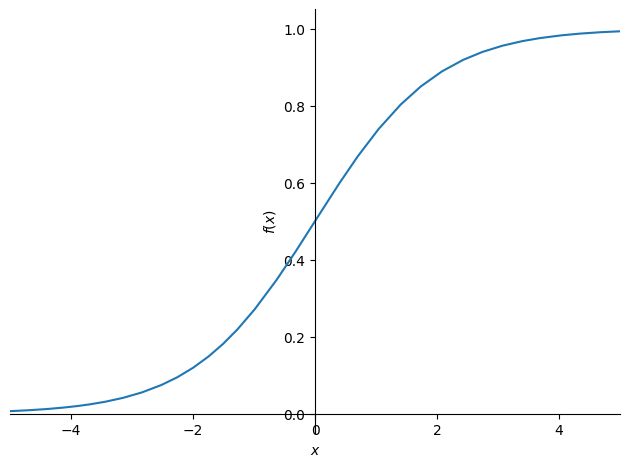

In [80]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [81]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

Treinamos um novo modelo com as previsões corrigidas. Utilizamos a função train_model para fazer isso. Agora, o cálculo das previsões utiliza a função torch.sigmoid para aplicar a sigmóide às previsões em vez de calcular diretamente indeps @ coeffs.

In [82]:
coeffs = train_model(lr=100)

0.530; 0.174; 0.193; 0.191; 0.187; 0.172; 0.125; 0.120; 0.119; 0.117; 0.116; 0.116; 0.116; 0.116; 0.116; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 

In [83]:
acc(coeffs)

tensor(0.8831)

In [84]:
show_coeffs()

{'LogLight_ISF': tensor(-2.0799),
 'Myco_AMF': tensor(6.5383),
 'Myco_EMF': tensor(-11.4423),
 'SoilMyco_AMF': tensor(-1.2025),
 'SoilMyco_EMF': tensor(-1.0782),
 'AMF': tensor(-0.6174),
 'EMF': tensor(-3.1649),
 'Phenolics': tensor(-6.7921),
 'Lignin': tensor(-4.8710),
 'NSC': tensor(-4.2865),
 'Census': tensor(-3.7709),
 'Time': tensor(-3.6186),
 'Event': tensor(15.7289),
 'Harvest_X': tensor(-4.8371),
 'Alive_X': tensor(-4.4806),
 'SoilMyco_Sterile': tensor(-2.1168)}

Nesta célula, simplificamos o cálculo das previsões utilizando uma operação de produto matricial (indeps @ coeffs). Isso é mais eficiente e produz os mesmos resultados. Também atualizamos a função init_coeffs para criar coeficientes com uma única coluna.

In [85]:
(val_indep*coeffs).sum(axis=1)

tensor([  5.4465, -54.8888,  -5.6922,   6.8489, -54.8616,   7.0366,   8.5912, -53.5010,  11.2341, -57.0522, -52.2733,  -5.6774, -34.4464,
        -56.5481,   9.2672,   6.9701, -44.8340,   8.0361,   5.8975,   7.4462,   9.2539,   6.9078, -49.9407,   9.4971, -58.1069, -34.1935,
          7.7123,   8.4648, -36.5212, -33.9073,  10.3038, -53.8228,   6.7534,   8.2780, -51.5414, -46.4497, -46.8960,  -6.9742, -37.9436,
        -51.0638,  -3.5449, -49.1557,   7.1410,   7.9132, -57.6604, -32.6647,   6.0692,   8.0546, -52.8295,   8.0736,  10.3556, -49.2551,
        -50.1779,   8.1510,   8.4996, -50.2388, -52.8360, -45.5872,   8.8984,   9.0341, -56.9656, -49.7268,   8.5922,   9.0111,  -3.6634,
         -3.5130, -49.4304, -35.2864, -53.1187, -36.4292, -35.4280,  -4.3702, -55.6515,  -4.0967,   9.3480,  10.5739,  -9.0993,   6.7050,
          6.4434,   9.2707, -57.2124, -53.9916, -49.8058,  -6.7492, -53.2116,   8.5478, -36.9695, -47.4723,   8.8815,   9.9824, -38.0653,
          7.4106, -38.1575,   9.63

In [86]:
val_indep@coeffs

tensor([  5.4465, -54.8888,  -5.6922,   6.8489, -54.8616,   7.0366,   8.5912, -53.5010,  11.2341, -57.0522, -52.2733,  -5.6774, -34.4464,
        -56.5481,   9.2672,   6.9701, -44.8340,   8.0361,   5.8975,   7.4462,   9.2539,   6.9078, -49.9407,   9.4971, -58.1070, -34.1935,
          7.7123,   8.4648, -36.5212, -33.9073,  10.3038, -53.8228,   6.7534,   8.2780, -51.5414, -46.4497, -46.8960,  -6.9742, -37.9436,
        -51.0638,  -3.5449, -49.1557,   7.1410,   7.9132, -57.6604, -32.6647,   6.0692,   8.0546, -52.8295,   8.0736,  10.3556, -49.2551,
        -50.1779,   8.1510,   8.4996, -50.2388, -52.8360, -45.5872,   8.8984,   9.0341, -56.9656, -49.7268,   8.5922,   9.0111,  -3.6634,
         -3.5130, -49.4304, -35.2864, -53.1187, -36.4292, -35.4280,  -4.3702, -55.6515,  -4.0967,   9.3480,  10.5739,  -9.0993,   6.7050,
          6.4434,   9.2707, -57.2124, -53.9916, -49.8058,  -6.7492, -53.2116,   8.5478, -36.9695, -47.4723,   8.8815,   9.9824, -38.0653,
          7.4106, -38.1575,   9.63

In [87]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [88]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

Os dados dependentes para os conjuntos de treinamento e validação são adaptados para terem uma única coluna, permitindo a realização de produtos matriciais com os coeficientes.

In [89]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

Treinamos o modelo como antes e verificamos a precisão no conjunto de validação. A precisão é obtida com a função acc(coeffs) para o modelo treinado com as previsões ajustadas.

Agora o modelo é treinado de forma mais eficiente e com resultados semelhantes.

In [90]:
coeffs = train_model(lr=100)

0.484; 0.298; 0.196; 0.195; 0.195; 0.195; 0.194; 0.191; 0.187; 0.172; 0.124; 0.123; 0.125; 0.117; 0.116; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 0.115; 

In [91]:
acc(coeffs)

tensor(0.8831)

## Rede Neural
Aqui, estamos implementando uma rede neural. Primeiro, precisamos criar coeficientes para cada uma de nossas camadas. Nossa primeira camada de coeficientes levará nossas entradas n_coeff e criará n_hidden saídas. Podemos escolher qualquer valor para n_hidden, mas um número maior oferece mais flexibilidade à rede, tornando-a mais lenta e difícil de treinar. Portanto, precisamos de uma matriz de tamanho n_coeff por n_hidden. Esses coeficientes são divididos por n_hidden para que, quando somarmos nas camadas seguintes, tenhamos números com magnitudes semelhantes às entradas originais.

Nesta célula, os coeficientes para a rede neural são inicializados. A função init_coeffs leva um argumento n_hidden (20 por padrão) e cria as matrizes para as duas camadas da rede, além do termo constante. As matrizes são inicializadas com valores aleatórios.

In [92]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

O cálculo das previsões é atualizado para usar as matrizes de coeficientes l1 e l2 juntamente com o termo constante. A primeira camada passa por uma função de ativação ReLU, e a segunda camada passa por uma função sigmóide, como antes.

In [93]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

esta célula, é adicionado um loop para atualizar cada conjunto de coeficientes. A função update_coeffs é responsável por subtrair o gradiente multiplicado pela taxa de aprendizado de cada coeficiente e, em seguida, zerar o gradiente.

In [94]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

Agora, o modelo de rede neural está pronto para ser treinado com a função train_model. O treinamento da rede neural envolve o ajuste dos coeficientes para melhorar o desempenho do modelo.

In [95]:
coeffs = train_model(lr=1.4)

0.457; 0.411; 0.386; 0.365; 0.352; 0.328; 0.305; 0.267; 0.227; 0.206; 0.176; 0.164; 0.154; 0.145; 0.135; 0.126; 0.117; 0.106; 0.095; 0.082; 0.070; 0.060; 0.053; 0.047; 0.044; 0.037; 0.033; 0.026; 0.022; 0.019; 

In [112]:
coeffs = train_model(lr=2.0)

0.457; 0.401; 0.375; 0.356; 0.326; 0.291; 0.248; 0.188; 0.170; 0.156; 0.143; 0.131; 0.119; 0.106; 0.090; 0.071; 0.054; 0.042; 0.035; 0.029; 0.025; 0.022; 0.020; 0.017; 0.015; 0.013; 0.011; 0.010; 0.010; 0.009; 

In [111]:
acc(coeffs)

tensor(1.)

In [107]:
coeffs = train_model(lr=4.4)

0.457; 0.392; 0.347; 0.293; 0.215; 0.191; 0.174; 0.134; 0.118; 0.123; 0.093; 0.448; 0.393; 0.120; 0.090; 0.086; 0.086; 0.085; 0.085; 0.085; 0.085; 0.084; 0.084; 0.084; 0.084; 0.084; 0.084; 0.084; 0.084; 0.084; 

In [108]:
acc(coeffs)

tensor(0.9137)

## Exportando para o hugginface
Para acessar o hugging face clique no link

In [116]:
torch.save(coeffs,"tensor.pt")

In [117]:
import os
os.path.exists("tensor.pt")


True

In [120]:
import os

# Obtém o diretório atual
current_directory = os.getcwd()

# Caminho absoluto para o arquivo "tensor.pt"
file_path = os.path.join(current_directory, "tensor.pt")

print(file_path)

/kaggle/working/tensor.pt
